In [42]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.eye(3)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.eye(3)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40, random_state=23)

In [43]:
df.head()

,feature1,feature2,feature3,target
18,-0.331617,-1.632386,0.619114,1
23,1.010229,1.437830,2.327788,0
8,0.241106,-0.952510,-0.136267,1
22,1.676860,4.187503,-0.080565,0
33,2.823378,-0.332863,2.637391,0


In [44]:
import plotly.express as px

fig = px.scatter_3d(
    df, 
    x=df['feature1'], 
    y=df['feature2'], 
    z=df['feature3'],
    color = df['target'].astype('str')
)

fig.update_traces(
    marker = dict(
        size=12,
        line= dict(
            width=2,
            color='DarkSlateGrey'
        )
    ),
    selector=dict(
        mode='markers'
    )
)

fig.show()

In [45]:
# Step 1 - Applying Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [46]:
# Step 2 - Find Covariance Matrix

convariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print('Covariance Matrix:\n', convariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [47]:
# Step 3 - Finding EV and EVs

eigen_values, eigen_vectors = np.linalg.eig(convariance_matrix)

In [48]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [49]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning:

pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy



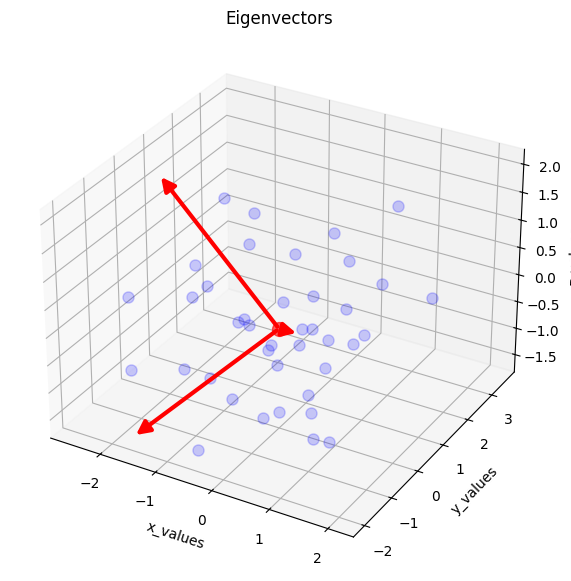

In [50]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)


# ====== PLOT ======

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.plot(
    df['feature1'],
    df['feature2'],
    df['feature3'],
    'o',
    markersize=8,
    color='blue',
    alpha=0.2
)

# Mean point
mean = df[['feature1', 'feature2', 'feature3']].mean().values
ax.plot([mean[0]], [mean[1]], [mean[2]], 'o', markersize=10, color='red', alpha=0.6)

# Eigenvectors
for v in eigen_vectors.T:
    v = v * 3  # scale for visibility
    a = Arrow3D(
        [mean[0], mean[0] + v[0]],
        [mean[1], mean[1] + v[1]],
        [mean[2], mean[2] + v[2]],
        mutation_scale=20,
        lw=3,
        arrowstyle="-|>",
        color="r"
    )
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')

plt.show()


In [51]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [52]:
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)

new_df = pd.DataFrame(transformed_df, columns = ['PC1', 'PC2'])
new_df['target'] = df['target'].values

new_df.head()

,PC1,PC2,target
0,1.726114,0.492511,1
1,-0.220797,-1.441911,0
2,0.688605,0.658084,1
3,-3.367715,-0.254627,0
4,0.227326,-2.669841,0


In [53]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                y=new_df['PC2'],
                color=new_df['target'],
                color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                            line=dict(width=2,
                                        color='DarkSlateGrey')),
                selector=dict(mode='markers'))
fig.show()